In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
### Load Graphs
data_base_path = "data/"
data_rnd_base_path = "data_random/"

G_ff = nx.read_gml(data_base_path + "graph_florentine_families.gml")
# G_ff_rnd = nx.algorithms.smallworld.random_reference(G_ff, niter = 10, connectivity=False)
G_ff_rnd = nx.read_gml(data_rnd_base_path + "graph_florentine_families_random.gml")

G_e_al = nx.read_gml(data_base_path + "graph_eu_airlines.gml")
G_fb = nx.read_gml(data_base_path + "graph_facebook.gml")
G_ap = nx.read_gml(data_base_path + "graph_AstroPh.gml")
G_cm = nx.read_gml(data_base_path + "graph_CondMat.gml")
G_gt = nx.read_gml(data_base_path + "graph_game_thrones.gml")
G_ci = nx.read_gml(data_base_path + "graph_celegansInteractomes.gml")
G_in = nx.read_gml(data_base_path + "graph_internet.gml")
G_c = nx.read_gml(data_base_path + "graph_chess.gml")
G_jc = nx.read_gml(data_base_path + "graph_jazz_collab.gml")
G_d = nx.read_gml(data_base_path + "graph_dolphins.gml")
G_t = nx.read_gml(data_base_path + "graph_terrorists.gml")

G_e_al_rnd = nx.read_gml(data_rnd_base_path + "graph_eu_airlines_random.gml")
G_fb_rnd = nx.read_gml(data_rnd_base_path + "graph_facebook_random.gml")
G_ap_rnd = nx.read_gml(data_rnd_base_path + "graph_AstroPh_random.gml")
G_cm_rnd = nx.read_gml(data_rnd_base_path + "graph_CondMat_random.gml")
G_gt_rnd = nx.read_gml(data_rnd_base_path + "graph_game_thrones_random.gml")
G_ci_rnd = nx.read_gml(data_rnd_base_path + "graph_celegansInteractomes_random.gml")
G_in_rnd = nx.read_gml(data_rnd_base_path + "graph_internet_random.gml")
G_c_rnd = nx.read_gml(data_rnd_base_path + "graph_chess_random.gml")
G_jc_rnd = nx.read_gml(data_rnd_base_path + "graph_jazz_collab_random.gml")
G_d_rnd = nx.read_gml(data_rnd_base_path + "graph_dolphins_random.gml")
G_t_rnd = nx.read_gml(data_rnd_base_path + "graph_terrorists_random.gml")

output_list = [
    ["graph_florentine_families", G_ff, G_ff_rnd],
    ["graph_eu_airlines", G_e_al, G_e_al_rnd],
    ["graph_eu_airlines_random", G_e_al, G_e_al_rnd],
    ["graph_facebook_random", G_fb, G_fb_rnd],
    ["graph_AstroPh_random", G_ap, G_ap_rnd],
    ["graph_CondMat_random", G_cm, G_cm_rnd],
    ["graph_game_thrones_random", G_gt, G_gt_rnd],
    ["graph_celegansInteractomes_random", G_ci, G_ci_rnd],
    ["graph_internet_random", G_in, G_in_rnd],
    ["graph_chess_random", G_c, G_c_rnd],
    ["graph_jazz_collab_random", G_jc, G_jc_rnd],
    ["graph_dolphins_random", G_d, G_d_rnd],
    ["graph_terrorists_random", G_t, G_t_rnd]
]
print("Scanning graph file is done\n"+"-----------------------")

Scanning graph file is done
-----------------------


# A02.1-1

In [3]:
def avg_knn(G):
    node_avg_degree = nx.average_neighbor_degree(G) #Dict of average neighbor degree of each node
    avg_neighbor_deg = [node_avg_degree[i] for i in G.nodes()] #array of average neighbor degree of each node
    degree = [G.degree()[i] for i in G.nodes()] #array of degree of each node
    plt_x = []
    avg_degree_sum_list = []
    count = []

    for i in range(0, max(degree) + 1):
        plt_x.append(i)
        avg_degree_sum_list.append(0)
        count.append(0)

    for x in range (0, len(degree)):
        k = degree[x]
        count[k] = count[k] + 1
        avg_degree_sum_list[k] = avg_degree_sum_list[k] + avg_neighbor_deg[x]

    del plt_x[0]
    del count[0]
    del avg_degree_sum_list[0]

    avg_degree_list = [i / j if j else 0 for i, j in zip(avg_degree_sum_list, count)]
    return plt_x, avg_degree_list

# x-axis: degree k, y-axis: knn(k)
def draw_plot_knn(G):
    plt_x, avg_degree_list = avg_knn(G)
    plt.subplot(211)
    plt.scatter(plt_x, avg_degree_list)


## A02.1-2,3

In [4]:
def print_assortativity_coefficient(G, G_rdm):
    G_acoe = nx.degree_assortativity_coefficient(G)
    G_acoe_rdm = nx.degree_assortativity_coefficient(G_rdm)
    print("assortativity coefficient: " + str(round(G_acoe, 4)))
    print("assortativity coefficient of random: "+ str(round(G_acoe_rdm, 4)))

## A02.2 - 1

In [5]:
## todo what is x-axis?
# degrees = [G.degree(n) for n in G.nodes()]

# plt.hist(degrees)
# plt.show()

## A02.2 -  2

In [6]:
## return C_i, C_rnd_i
def node_clustering_coefficient(G, G_rnd, node_key):
    G_ccoe = nx.algorithms.cluster.clustering(G)
    G_rnd_ccoe = nx.algorithms.cluster.clustering(G_rnd)
    ## TODO: print every node or not?
    return G_ccoe[node_key], G_rnd_ccoe[node_key]

## A02.2 -  3

In [7]:
def scatter_clustering_coefficient(G, G_rnd):
    G_ccoe = nx.algorithms.cluster.clustering(G)
    G_coe_array = [G_ccoe[i] for i in G.nodes()]
    
    G_rnd_ccoe = nx.algorithms.cluster.clustering(G_rnd)
    G_rnd_coe_array = [G_rnd_ccoe[i] for i in G_rnd.nodes()]

    plt.subplot(212)
    G_plt = plt.scatter(G.nodes(), G_coe_array, marker="o")
    G_rnd_plt = plt.scatter(G_rnd.nodes(), G_rnd_coe_array, marker="x")
    plt.legend((G_plt, G_rnd_plt),
           ('original', 'random'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
    plt.show()

# Output for All Graphs

--------------------------
---graph_florentine_families---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: -0.4786
assortativity coefficient of random: -0.0098
A02.2 - 1
A02.2 - 2
A02.2 - 3


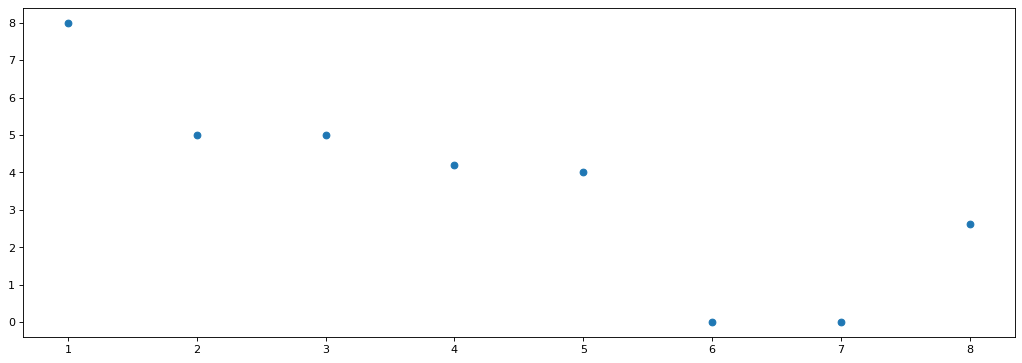

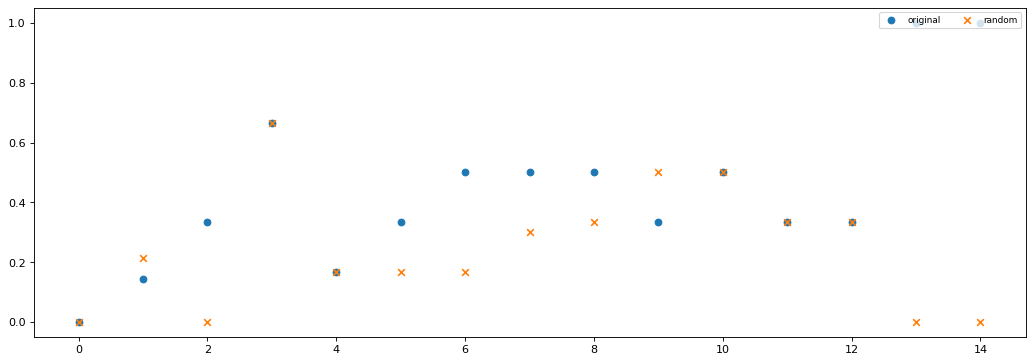

--------------------------
---graph_eu_airlines---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: -0.1518
assortativity coefficient of random: -0.2239
A02.2 - 1
A02.2 - 2
A02.2 - 3


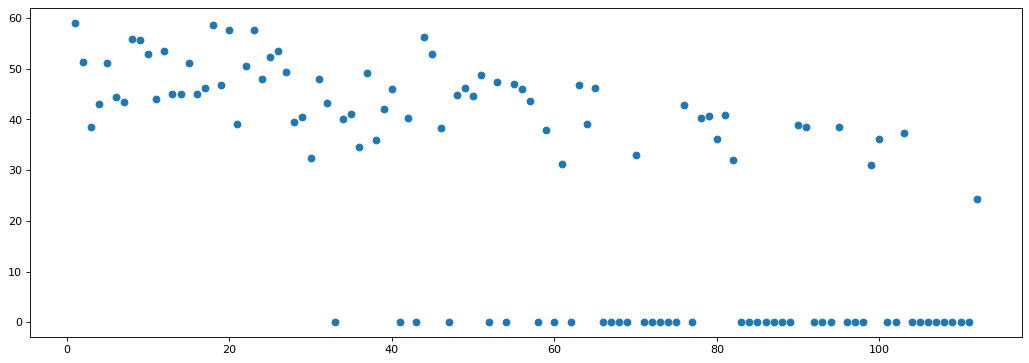

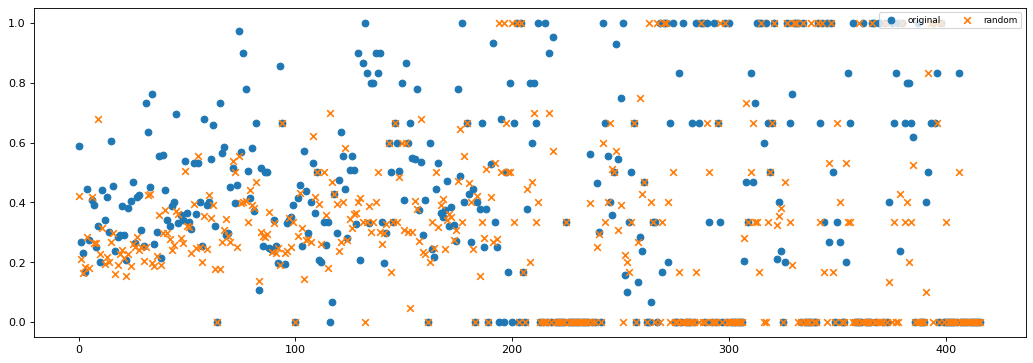

--------------------------
---graph_eu_airlines_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: -0.1518
assortativity coefficient of random: -0.2239
A02.2 - 1
A02.2 - 2
A02.2 - 3


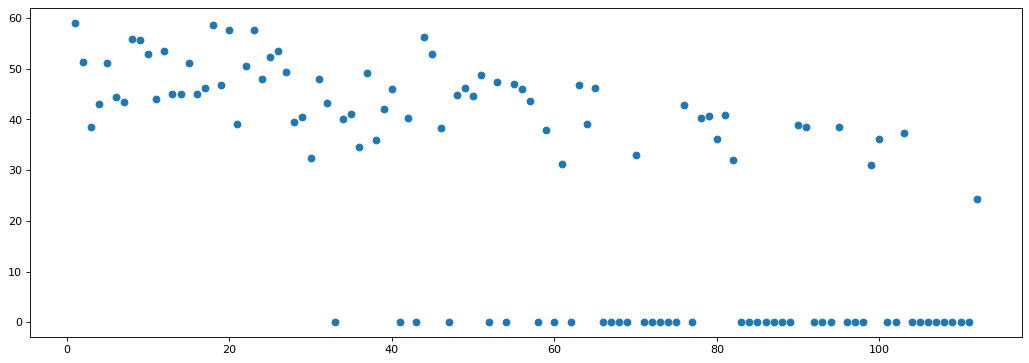

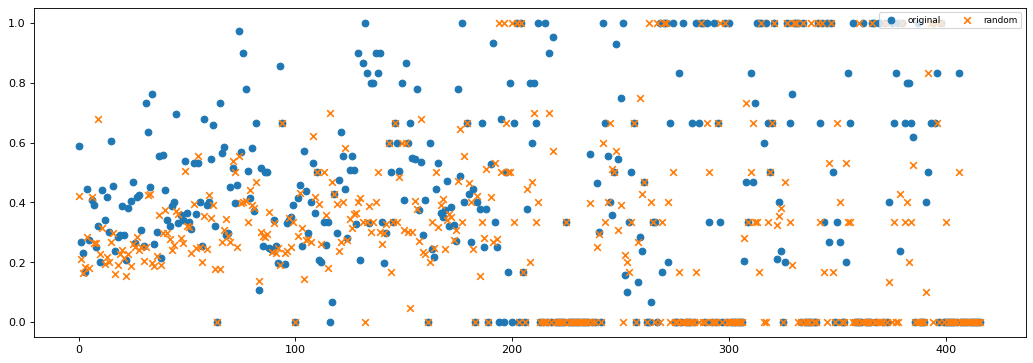

--------------------------
---graph_facebook_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: 0.0636
assortativity coefficient of random: -0.0347
A02.2 - 1
A02.2 - 2
A02.2 - 3


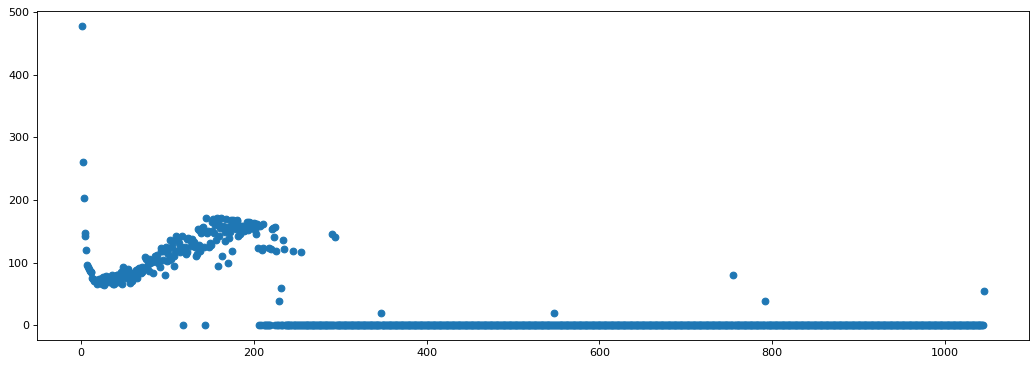

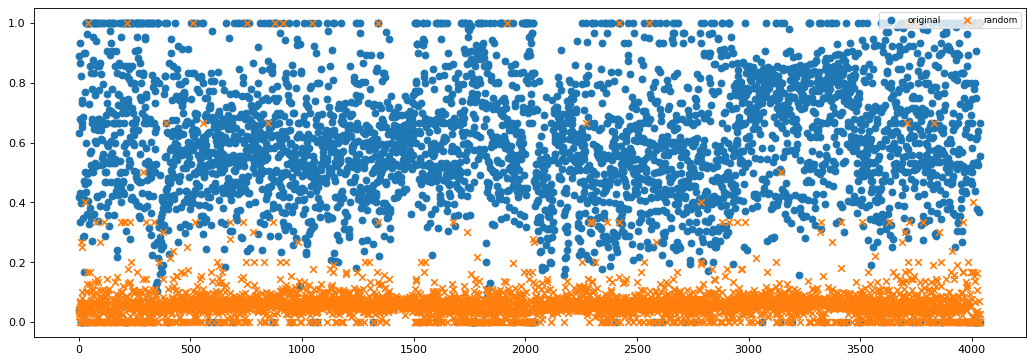

--------------------------
---graph_AstroPh_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: 0.2013
assortativity coefficient of random: 0.0168
A02.2 - 1
A02.2 - 2
A02.2 - 3


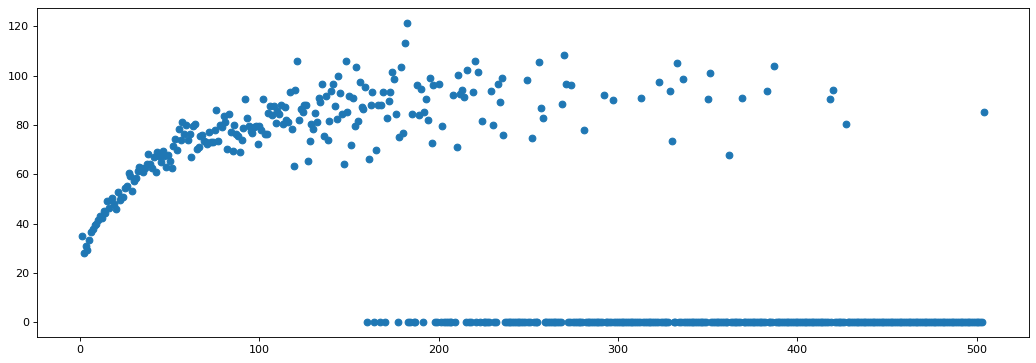

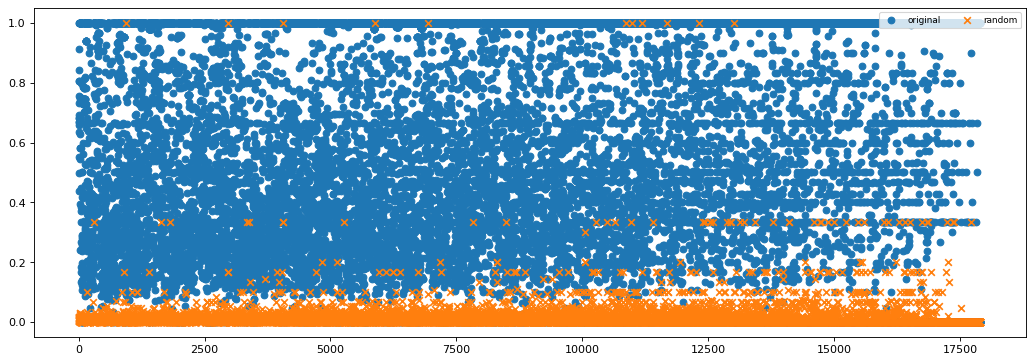

--------------------------
---graph_CondMat_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: 0.1253
assortativity coefficient of random: 0.0106
A02.2 - 1
A02.2 - 2
A02.2 - 3


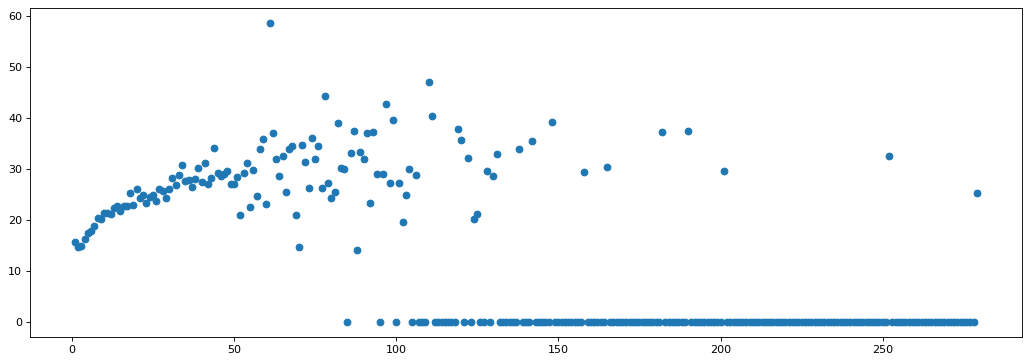

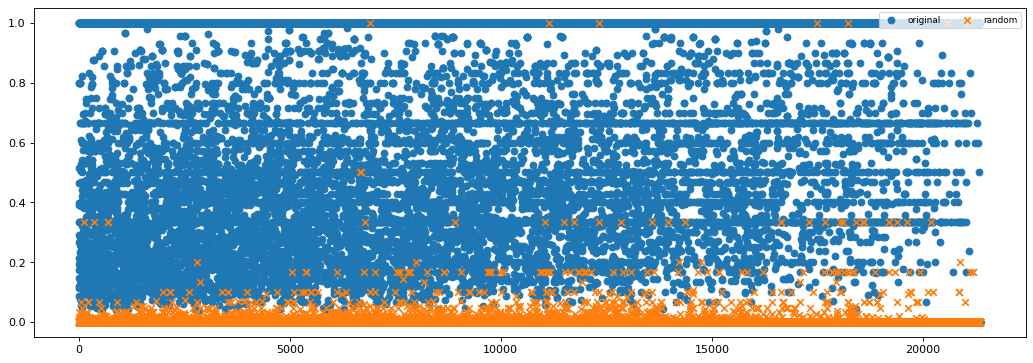

--------------------------
---graph_game_thrones_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: -0.1308
assortativity coefficient of random: -0.1632
A02.2 - 1
A02.2 - 2
A02.2 - 3


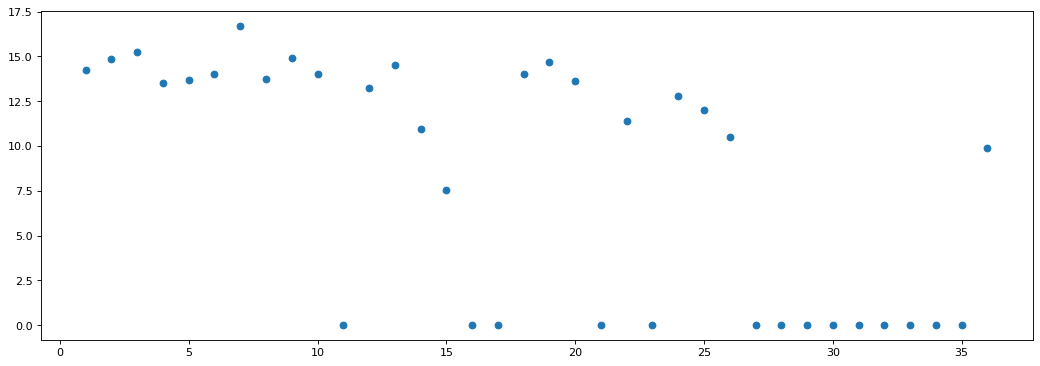

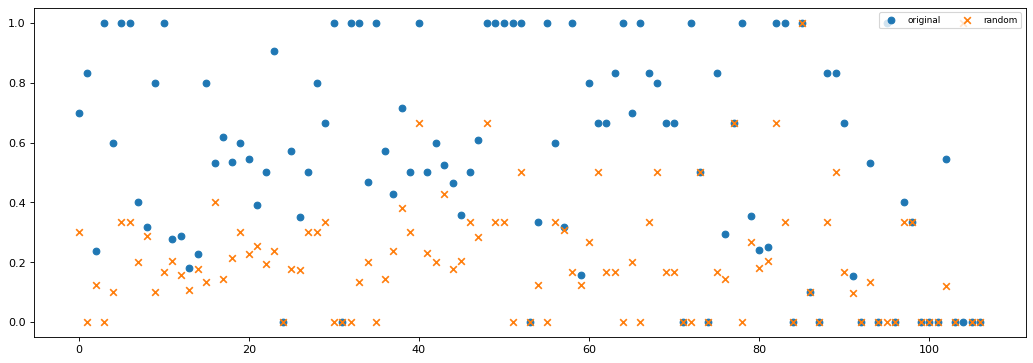

--------------------------
---graph_celegansInteractomes_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: 0.1517
assortativity coefficient of random: -0.1604
A02.2 - 1
A02.2 - 2
A02.2 - 3


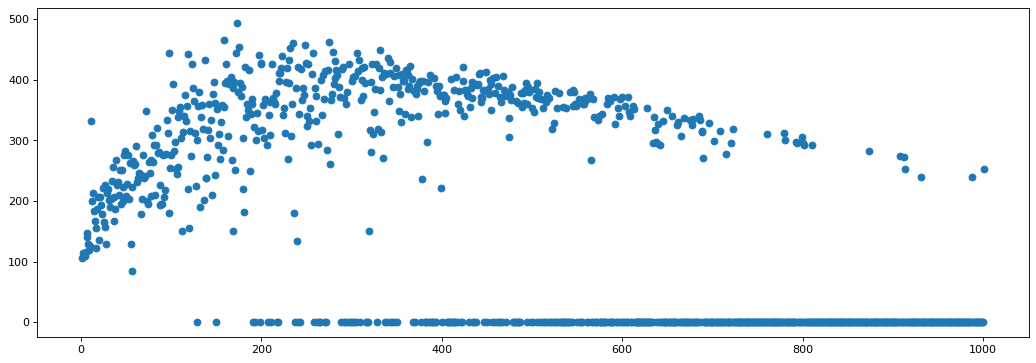

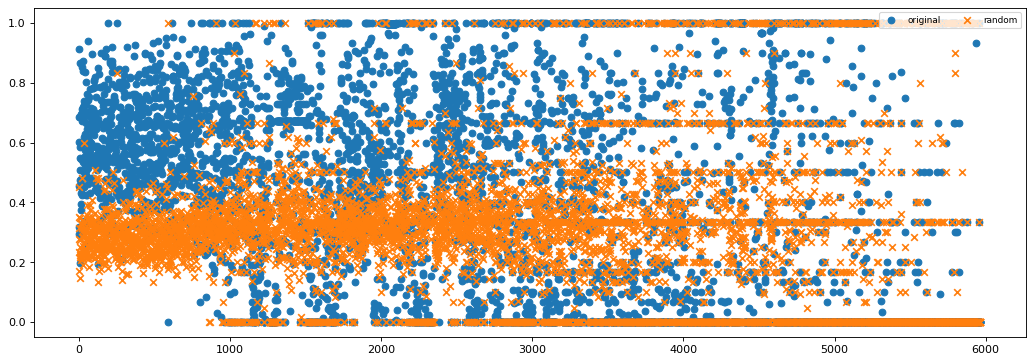

--------------------------
---graph_internet_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: -0.2149
assortativity coefficient of random: -0.1978
A02.2 - 1
A02.2 - 2
A02.2 - 3


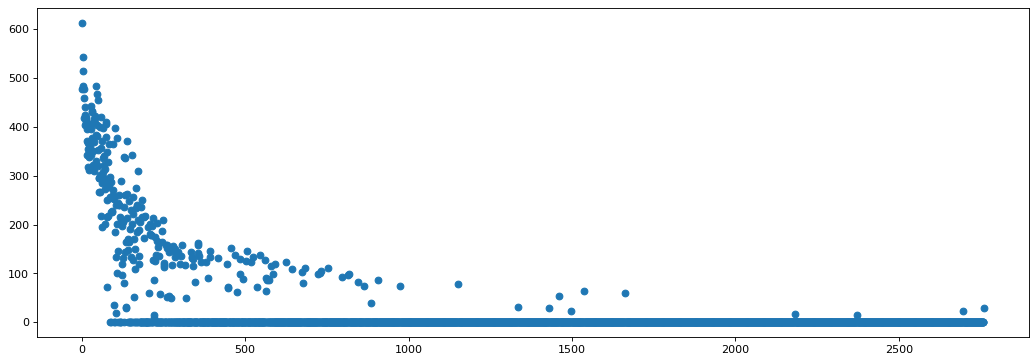

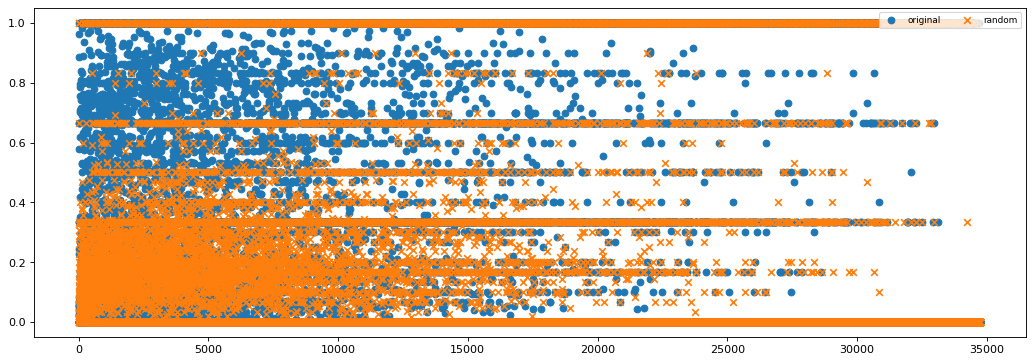

--------------------------
---graph_chess_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: 0.3705
assortativity coefficient of random: 0.0404
A02.2 - 1
A02.2 - 2
A02.2 - 3


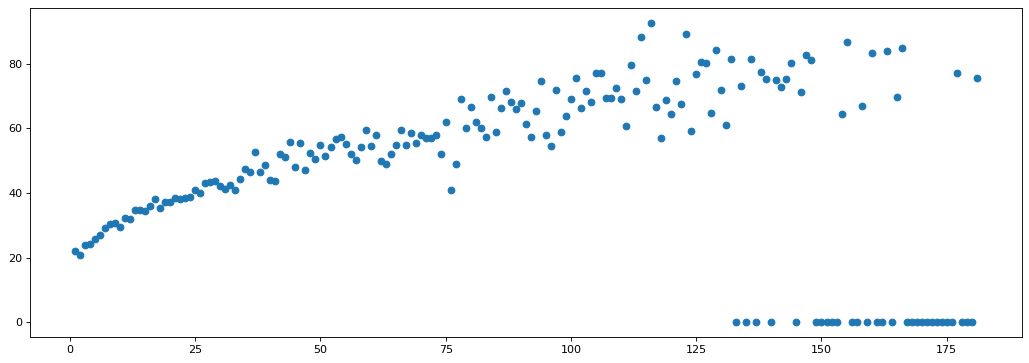

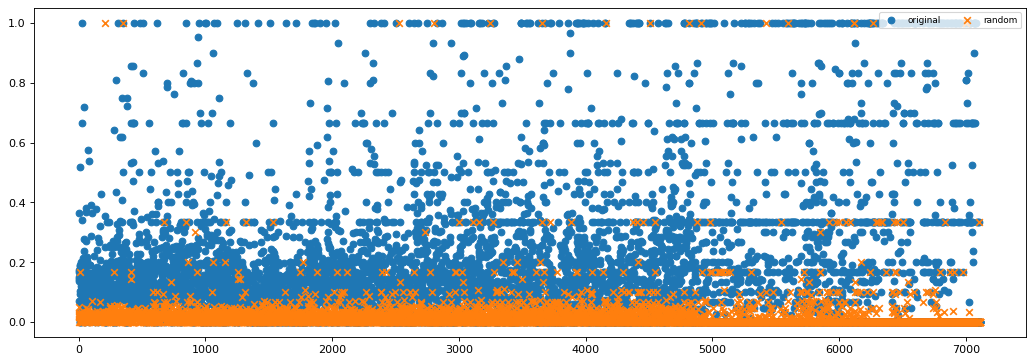

--------------------------
---graph_jazz_collab_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: 0.0202
assortativity coefficient of random: -0.0727
A02.2 - 1
A02.2 - 2
A02.2 - 3


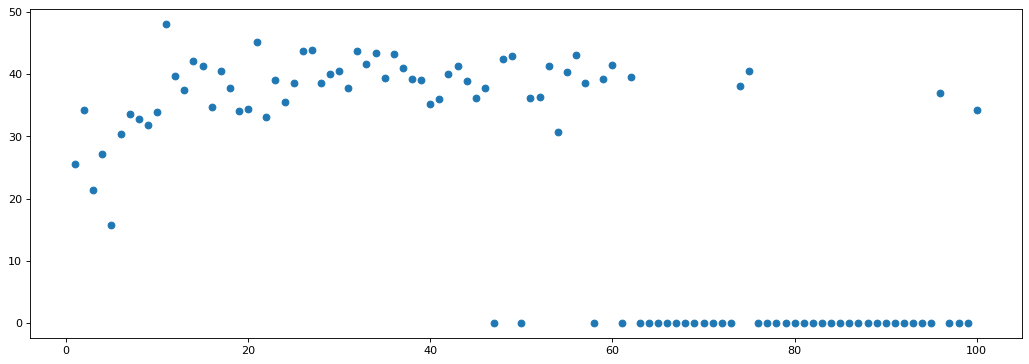

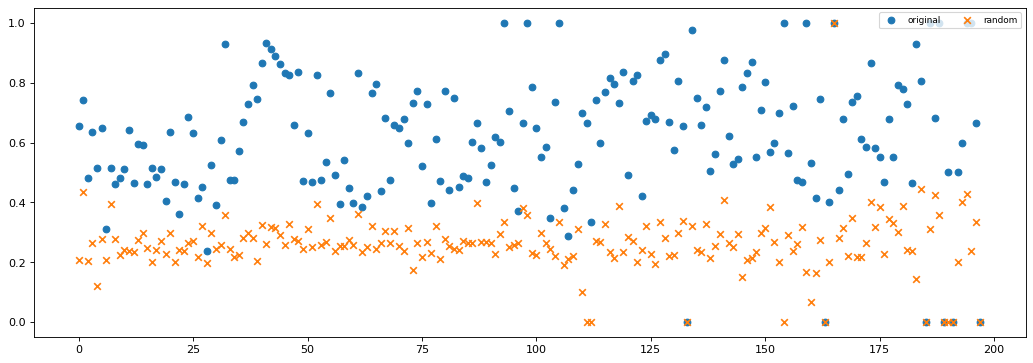

--------------------------
---graph_dolphins_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: -0.0436
assortativity coefficient of random: -0.156
A02.2 - 1
A02.2 - 2
A02.2 - 3


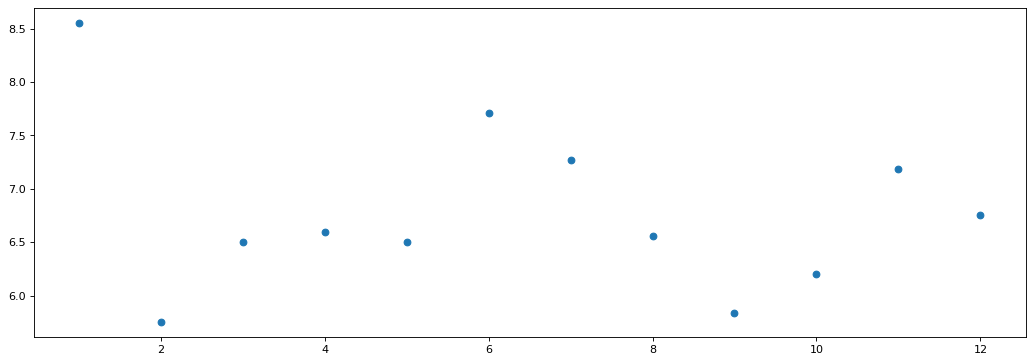

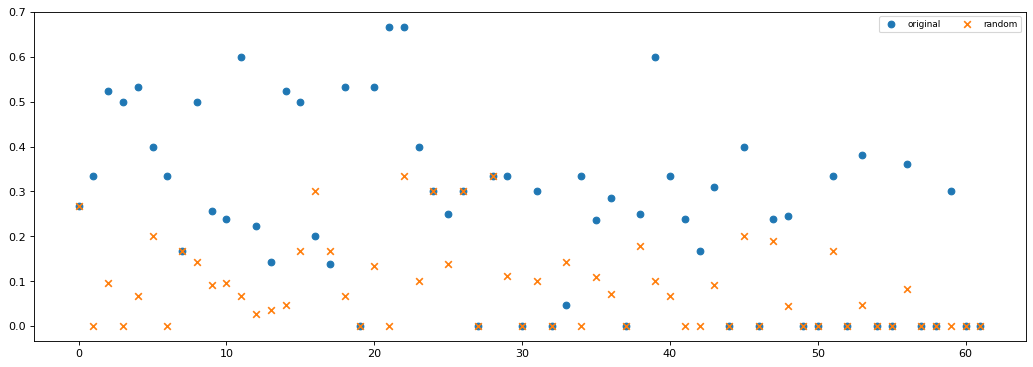

--------------------------
---graph_terrorists_random---
A02.1 - 1
A02.1 - 2 & 3
assortativity coefficient: -0.0805
assortativity coefficient of random: -0.0718
A02.2 - 1
A02.2 - 2
A02.2 - 3


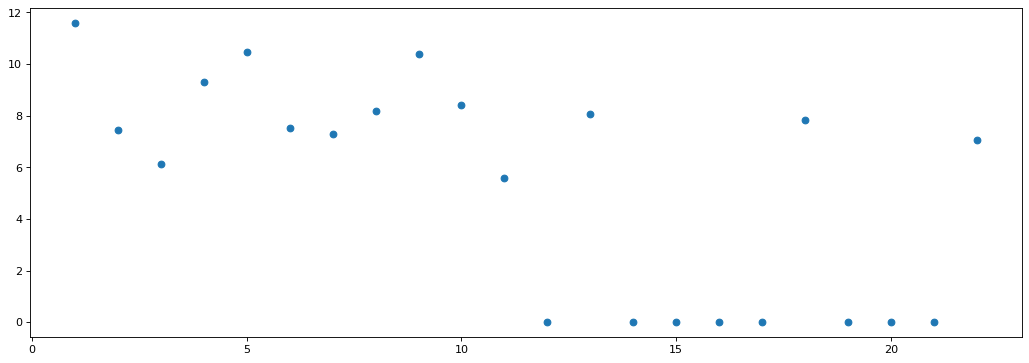

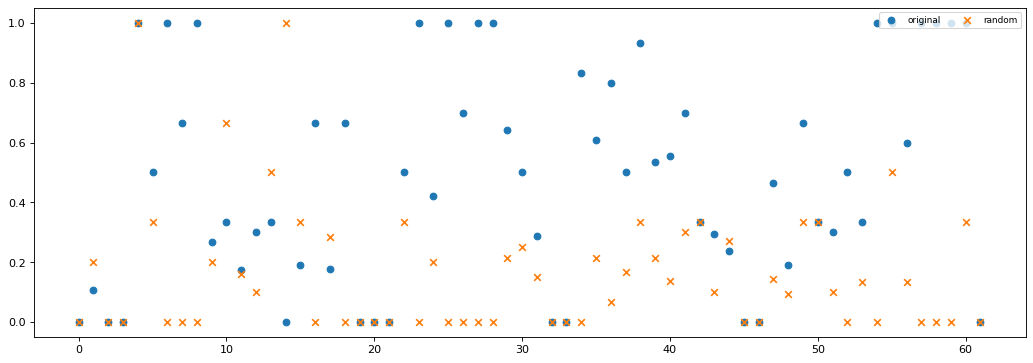

In [9]:
i=0
for item in output_list:

    G_name = item[0]
    G = item[1]
    G_rnd = item[2]
    print("--------------------------")
    print("---"+G_name+"---")
    print("A02.1 - 1")
    plt.figure(i,figsize=(16, 12), dpi=80)
    draw_plot_knn(G)
    i=i+1
    
    print("A02.1 - 2 & 3")
    print_assortativity_coefficient(G, G_rnd)
    print("A02.2 - 1")
    print("A02.2 - 2")
    print("A02.2 - 3")

    plt.figure(i,figsize=(16, 12), dpi=80)
    scatter_clustering_coefficient(G, G_rnd)
    i=i+1